In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.src.utils.data_utils import get_file
import keras_vggface
from keras_vggface.vggface import VGGFace
import mtcnn
import keras_vggface.utils
import PIL
import os
import os.path



In [20]:
vggface = VGGFace(model='vgg16')



580070376/580070376 [==============================] - 168s 0us/step


In [21]:
print(vggface.summary())
print(f"Inputs: {vggface.inputs}")
print(f"Outputs: {vggface.outputs}")

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [22]:
!mkdir public_images
!wget -O puiblic_images/scalia.jpg 'https://commons.wikimedia.org/wiki/File:Antonin_Scalia_Official_SCOTUS_Portrait.jpg'

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [71]:
scalia_photo = plt.imread('public_images/sorvino.jpg')
scalia_photo.shape

(1365, 2048, 3)

In [72]:
face_detector = mtcnn.MTCNN()
face_roi = face_detector.detect_faces(scalia_photo)

1/1 [==============================] - 1s 605ms/step


In [73]:
face_roi

[{'box': [999, 157, 377, 496],
  'confidence': 0.999916672706604,
  'keypoints': {'left_eye': (1087, 349),
   'right_eye': (1259, 370),
   'nose': (1149, 456),
   'mouth_left': (1077, 515),
   'mouth_right': (1236, 540)}}]

In [74]:
x1, y1, width, height = face_roi[0]['box']
x2, y2 = x1 + width, y1 + height
face = scalia_photo[y1:y2, x1:x2]
print(face.shape)

(496, 377, 3)


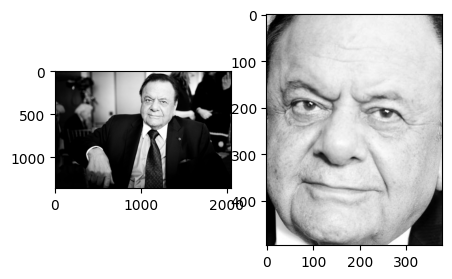

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5,3))
axes[0].imshow(scalia_photo)
axes[1].imshow(face)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(496, 377, 3)
1/1 [==============================] - 0s 280ms/step


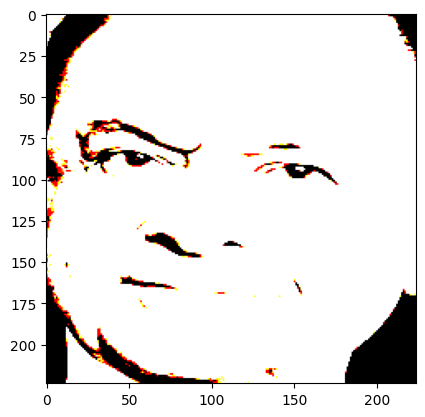

In [76]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from PIL import Image
import numpy as np

def resize_image(image_array, target_size):
    image = Image.fromarray(image_array)
    resized_image = image.resize(target_size)
    return np.array(resized_image)


print(face.shape)
# Assuming face_array is your input image data
face_array_resized = resize_image(face, target_size=(224, 224))

# Expand dimensions to create a batch of size 1
face_array_expanded = np.expand_dims(face_array_resized, axis=0)
plt.imshow(face_array_expanded[0])

# Preprocess the input data for VGG16
face_array_preprocessed = preprocess_input(face_array_expanded)
plt.imshow(face_array_preprocessed[0])

predictions = vggface.predict(face_array_expanded)

In [83]:
names = decode_predictions(predictions)

In [57]:
from keras_vggface.utils import decode_predictions

In [81]:
names[0]

[["b'Paul_Sorvino'", 0.99999785],
 ["b'David_Jason'", 2.1520336e-06],
 ["b'Om_Puri'", 3.5294708e-08],
 ["b'Karl_Malden'", 3.2858402e-08],
 ["b'Adam_Garcia'", 3.0942044e-09]]